### Imports

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import h5py

import tensorflow as tf

from tensorflow.keras.utils import image_dataset_from_directory, save_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Working with the Happy/Sad Dataset

## Happy/Sad Dataset - Image Processing and Loading

In [2]:
happy_train_dataset = h5py.File("./happy/train_happy.h5/train_happy.h5") 
happy_train_x = np.array(happy_train_dataset['train_set_x'][:]) 
happy_train_y = np.array(happy_train_dataset['train_set_y'][:])

happy_test_dataset = h5py.File("./happy/test_happy.h5/test_happy.h5")
happy_test_x = np.array(happy_test_dataset['test_set_x'][:])
happy_test_y = np.array(happy_test_dataset['test_set_y'][:])

print('X_train.shape = ',happy_train_x.shape)
print('X_test.shape = ',happy_test_x.shape)

print('train_y.shape = ',happy_train_y.shape)
print('test_y.shape = ',happy_test_y.shape)


# y reshaped
# train_y = happy_train_y.reshape((1, happy_train_y.shape[0]))
# test_y = happy_test_y.reshape((1, happy_test_y.shape[0]))
# train_y.shape
# test_y.shape

X_train.shape =  (600, 64, 64, 3)
X_test.shape =  (150, 64, 64, 3)
train_y.shape =  (600,)
test_y.shape =  (150,)


index =  445 , result =  0
(64, 64, 3)


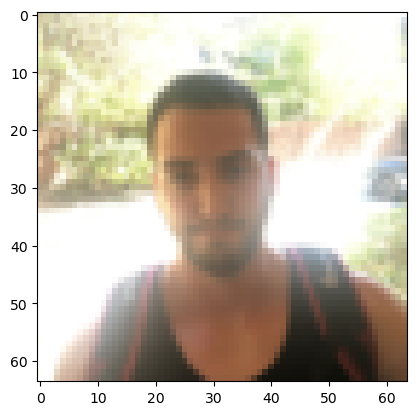

In [3]:
index = random.randint(1,600)
plt.imshow(happy_train_x[index])
print('index = ', index,', result = ', happy_train_y[index])
print(happy_train_x[index].shape)

# Happy = 1, Sad = 0

## Model for Happy/Sad prediction

<img src="./images/keras-vgg16.webp">
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16-1024x450.jpg">



### VGG16 like model definition

In [42]:
HS_model = Sequential([
    # First Convolutional Layer with ReLU activation
    # Default stride in tensorflow Conv2D is (1,1)
    Conv2D(16, (3,3), padding='same', input_shape=(64, 64, 3)),
    Activation('relu'),
    MaxPooling2D(2, 2),
    # Second Convolutional Layer with ReLU activation
    Conv2D(32, (3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(2,2),
    # Third Convolutional Layer with ReLU activation
    Conv2D(32, (3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

HS_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 activation_6 (Activation)   (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

### Model Compilation and training

In [ ]:
HS_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_checkpoint_callback = ModelCheckpoint(
    filepath='./saved_models/happy_sad_model.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')

HS_model.fit(
    happy_train_x,
    happy_train_y,
    validation_data=(happy_test_x, happy_test_y),
    epochs=15, 
    callbacks=[model_checkpoint_callback, early_stopping]
)

### Saving the model

In [ ]:
HS_model.save('./saved_models/HS_model.keras')

# Working with the Male Female Dataset

## Male/female Dataset - Image Processing and Loading

In [4]:
# batch_size = 32
img_height = 64
img_width = 64

# Sample dataset
train_ds = image_dataset_from_directory("./male-female-sample/training/", labels='inferred', image_size=(img_height, img_width))
validation_ds = image_dataset_from_directory("./male-female-sample/validation/", labels='inferred', image_size=(img_height, img_width))

Found 1200 files belonging to 2 classes.
Found 240 files belonging to 2 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)

['female', 'male']


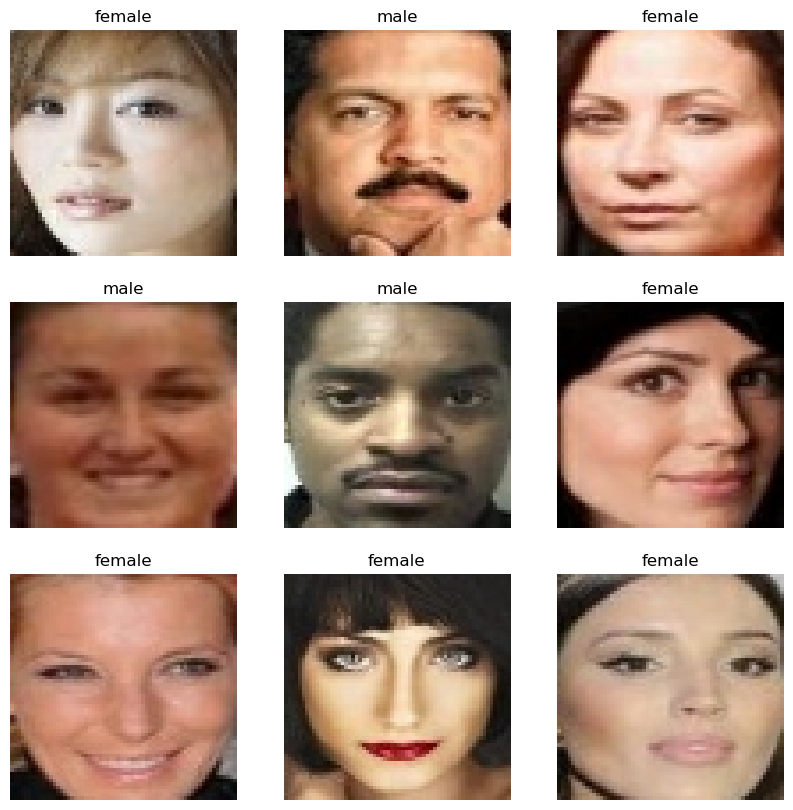

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Model for Male/Female prediction

In [ ]:
MF_model = Sequential([
    # Conv 1 with ReLU activation
    # Default stride in tensorflow Conv2D is (1,1)
    Conv2D(16, (3,3), padding='same', input_shape=(64, 64, 3)),
    Activation('relu'),
    # Pool 1
    MaxPooling2D(2, 2),
    Dropout(0.1),
    # Conv 2 with ReLU activation
    Conv2D(32, (3,3), padding='same'),
    Activation('relu'),
    # Pool 2
    MaxPooling2D(2,2),
    Dropout(0.1),
    # Conv 3 with ReLU activation
    Conv2D(32, (3,3), padding='same'),
    Activation('relu'),
    # Pool 3
    MaxPooling2D(2,2),
    Flatten(),
    #Dense layers with activation functions
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

MF_model.summary()

In [ ]:
MF_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_checkpoint_callback = ModelCheckpoint(
    filepath='./saved_models/male_female_model.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')

MF_model.fit(
    train_ds,
    validation_data=(validation_ds),
    epochs=15, 
    callbacks=[model_checkpoint_callback, early_stopping]
)

### Saving the model

In [ ]:
MF_model.save('./saved_models/MF_model.keras')

# Passing Male/Female Dataset through my Happy/Sad Trained Model

In [ ]:
# Loading the model and predicting the classes
HS_loaded_model = tf.keras.models.load_model('./saved_models/HS_model.keras')

# Show the model architecture
# HS_loaded_model.summary()

In [ ]:
MF_with_HS_labels = HS_loaded_model.predict(train_ds)
HS_labels = np.array([1 if value > 0.4 else 0 for value in MF_with_HS_labels])
HS_labels

In [ ]:
def save_images_to_new_training_classes():
    count=0
    
    for img,label in train_ds.unbatch().take(-1): # take all elements
        image = img.numpy()
        MF_label = label.numpy().astype(int)

        # Happy Male
        if MF_label == 1 and HS_labels[count] == 1:
            save_img("./MFHS_combined/training/HappyMale/mf"+str(count)+".jpg", image)
        # Happy Female
        if MF_label == 0 and HS_labels[count] == 1:
            save_img("./MFHS_combined/training/HappyFemale/mf"+str(count)+".jpg", image)
        # Sad Male
        if MF_label == 1 and HS_labels[count] == 0:
            save_img("./MFHS_combined/training/SadMale/mf"+str(count)+".jpg", image)
        # Sad Female
        if MF_label == 0 and HS_labels[count] == 0:
            save_img("./MFHS_combined/training/SadFemale/mf"+str(count)+".jpg", image)
        
        count+=1

def save_images_to_new_testing_classes():
    count=0
    for img2,label2 in validation_ds.unbatch().take(-1): # take all elements
        image = img2.numpy()
        MF_label = label2.numpy().astype(int)

        # Happy Male
        if MF_label == 1 and HS_labels[count] == 1:
            save_img("./MFHS_combined/testing/HappyMale/mf"+str(count)+".jpg", image)
        # Happy Female
        if MF_label == 0 and HS_labels[count] == 1:
            save_img("./MFHS_combined/testing/HappyFemale/mf"+str(count)+".jpg", image)
        # Sad Male
        if MF_label == 1 and HS_labels[count] == 0:
            save_img("./MFHS_combined/testing/SadMale/mf"+str(count)+".jpg", image)
        # Sad Female
        if MF_label == 0 and HS_labels[count] == 0:
            save_img("./MFHS_combined/testing/SadFemale/mf"+str(count)+".jpg", image)
        
        count+=1

In [ ]:
save_images_to_new_training_classes()

In [ ]:
MF_with_HS_labels = HS_loaded_model.predict(validation_ds)
HS_labels = np.array([1 if value > 0.4 else 0 for value in MF_with_HS_labels])
HS_labels

In [ ]:
save_images_to_new_testing_classes()

# Adding Happy/Sad Dataset into combined dataset

In [ ]:
# Loading the model and predicting the classes
# MF_loaded_model = tf.keras.models.load_model('./saved_models/MF_model.keras')

# Show the model architecture
# MF_loaded_model.summary()

Since the happy sad data only includes male images, I am iterating over the dataset to categorise them as HappyMale or SadMale only

In [ ]:
# Training Images
for i, img in enumerate(happy_train_x): # take all elements
    label = happy_train_y[i].astype(int)    
    # Happy 
    if label==1:
        save_img("./MFHS_combined/training/HappyMale/hs"+str(i)+".jpg", img)
    # Sad
    if label==0:
        save_img("./MFHS_combined/training/SadMale/hs"+str(i)+".jpg", img)

In [ ]:
# Testing Images
for i, img in enumerate(happy_test_x): # take all elements
    label = happy_test_y[i].astype(int)    
    # Happy 
    if label==1:
        save_img("./MFHS_combined/testing/HappyMale/hs"+str(i)+".jpg", img)
    # Sad
    if label==0:
        save_img("./MFHS_combined/testing/SadMale/hs"+str(i)+".jpg", img)

# Training a new model on the MFHS Combined Dataset

In [7]:
# batch_size = 32
img_height = 64
img_width = 64

# Sample dataset
MFHS_train_ds = image_dataset_from_directory("./MFHS_combined/training/", labels='inferred', image_size=(img_height, img_width))
MFHS_validation_ds = image_dataset_from_directory("./MFHS_combined/testing/", labels='inferred', image_size=(img_height, img_width))

Found 1800 files belonging to 4 classes.
Found 390 files belonging to 4 classes.


In [8]:
class_names = MFHS_train_ds.class_names
print(class_names)

['HappyFemale', 'HappyMale', 'SadFemale', 'SadMale']


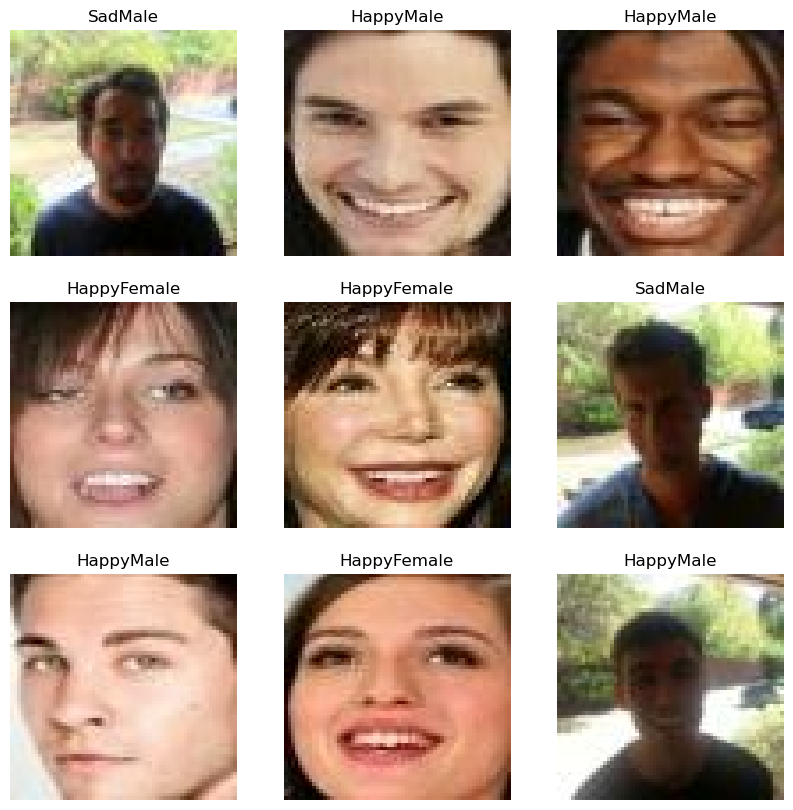

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in MFHS_train_ds.take(1):
    
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## New Model for HappyMale/ SadMale/ HappyFemale/ SadFemale prediction

In [12]:
MFHS_model = Sequential([
    # Conv 1 with ReLU activation
    # Default stride in tensorflow Conv2D is (1,1)
    Conv2D(16, (3,3), padding='same', input_shape=(64, 64, 3)),
    Activation('relu'),
    # Pool 1
    MaxPooling2D(2, 2),
    Dropout(0.1),
    # Conv 2 with ReLU activation
    Conv2D(32, (3,3), padding='same'),
    Activation('relu'),
    # Pool 2
    MaxPooling2D(2,2),
    Dropout(0.1),
    # Conv 3 with ReLU activation
    Conv2D(32, (3,3), padding='same'),
    Activation('relu'),
    # Pool 3
    MaxPooling2D(2,2),
    Flatten(),
    #Dense layers with activation functions
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

MFHS_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 activation_3 (Activation)   (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                      

In [13]:
MFHS_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_checkpoint_callback = ModelCheckpoint(
    filepath='./saved_models/MFHS_model_checkpoint.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')

history = MFHS_model.fit(
    MFHS_train_ds,
    validation_data= MFHS_validation_ds,
    epochs=20, 
    callbacks=[model_checkpoint_callback, early_stopping]
)

Epoch 1/20
57/57 [==============================] - 5s 68ms/step - loss: 23.7374 - accuracy: 0.5189 - val_loss: 0.9518 - val_accuracy: 0.5205
Epoch 2/20
57/57 [==============================] - 4s 62ms/step - loss: 0.8636 - accuracy: 0.5956 - val_loss: 0.9968 - val_accuracy: 0.5333
Epoch 3/20
57/57 [==============================] - 3s 59ms/step - loss: 0.8145 - accuracy: 0.6172 - val_loss: 0.8095 - val_accuracy: 0.6718
Epoch 4/20
57/57 [==============================] - 3s 60ms/step - loss: 0.8024 - accuracy: 0.6411 - val_loss: 0.7859 - val_accuracy: 0.7256
Epoch 5/20
57/57 [==============================] - 3s 60ms/step - loss: 0.7346 - accuracy: 0.6850 - val_loss: 0.7821 - val_accuracy: 0.6692
Epoch 6/20
57/57 [==============================] - 3s 59ms/step - loss: 0.7183 - accuracy: 0.7006 - val_loss: 0.6740 - val_accuracy: 0.7590
Epoch 7/20
57/57 [==============================] - 3s 58ms/step - loss: 0.6389 - accuracy: 0.7300 - val_loss: 0.6855 - val_accuracy: 0.7308
Epoch 8/20
5

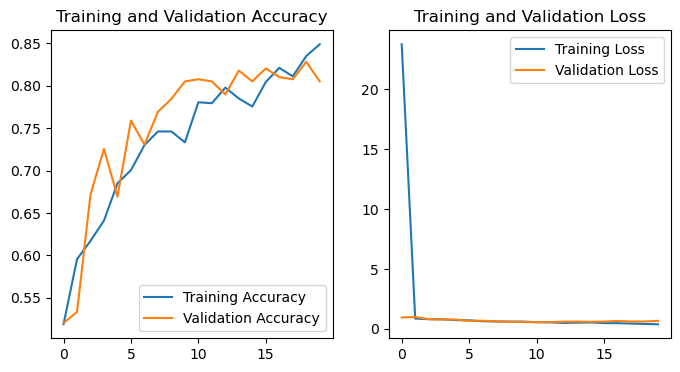

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
MFHS_model.save('./saved_models/MFHS_model.keras')

### Predicting

In [40]:
MFHS_model = tf.keras.models.load_model('./saved_models/MFHS_model.keras')
# predictions = MFHS_model.predict(MFHS_validation_ds)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to HappyMale with a 43.40 percent confidence.


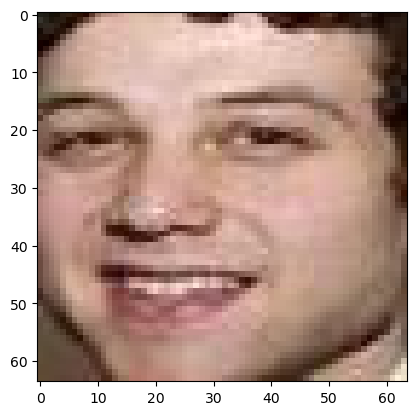

In [33]:
img = tf.keras.utils.load_img( "./images/mf677.jpg", target_size=(64, 64))
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = MFHS_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to HappyFemale with a 46.10 percent confidence.


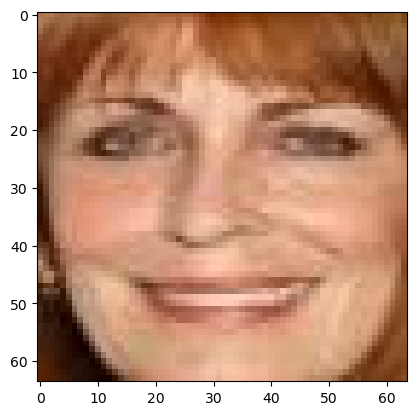

In [36]:
img = tf.keras.utils.load_img( "./images/mf87.jpg", target_size=(64, 64))
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = MFHS_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to HappyFemale with a 37.04 percent confidence.


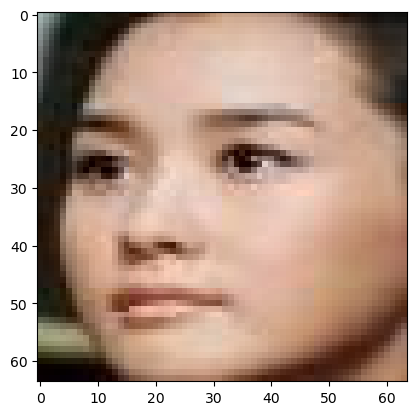

In [35]:
img = tf.keras.utils.load_img( "./images/mf21.jpg", target_size=(64, 64))
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = MFHS_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to SadMale with a 47.45 percent confidence.


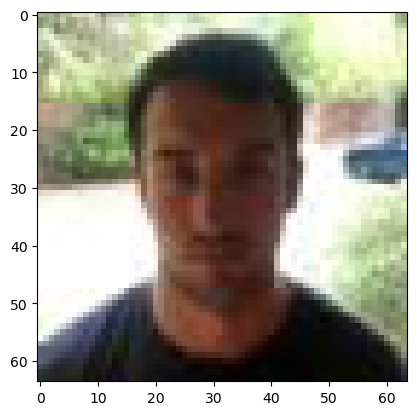

In [34]:
img = tf.keras.utils.load_img( "./images/hs103.jpg", target_size=(64, 64))
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = MFHS_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# Issues and Improvements

1. I trained the models for male female only on the sample dataset of 500 images due to the limited time. Has to be extended to the remaining dataset
2. Happy Sad Dataset only has male images
3. Male Female Dataset mostly includes happy or smiling images of people. So, the Sad label isn't balanced. Specifically `SadFemale` didn't have a reasonable training dataset.

> Can be extended to `224 x 224 x 3` image shape to compare models

**References:**

- Class notebooks
- Tensorflow docs: https://www.tensorflow.org/api_docs/python/tf/keras/
- VGG16 (argxiv: https://arxiv.org/pdf/1409.1556.pdf)
- Medium Post: https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918